# Declaration of Originality

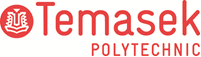

**TEMASEK POLYTECHNIC**
<br>**SCHOOL OF INFORMATICS & IT**
<br>**DIPLOMA IN INFORMATION TECHNOLOGY**
<br>**MACHINE LEARNING FOR DEVELOPERS (CAI2C08)**
<br>**AY2025/2026 OCTOBER SEMESTER**

**PROJECT PROGRAM CODES**
* Student Name (Matric Number)  :
* Tutorial Group                :  
* Tutor						    :  
* Submission Date               : 


**Declaration of Originality**
* I am the originator of this work and I have appropriately acknowledged all other original sources used as my references for this work.
* I understand that Plagiarism is the act of taking and using the whole or any part of another person’s work, including work generated by AI, and presenting it as my own.
* I understand that Plagiarism is an academic offence and if I am found to have committed or abetted the offence of plagiarism in relation to this submitted work, disciplinary action will be enforced.

# Libraries

In [49]:
## Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly

# 1. Business Understanding
Goal: The goal of this project is to develop a machine learning model that predicts an individual’s risk of stroke based on demographic and clinical attributes, in order to support early identification of high-risk patients and enable timely medical intervention.

# 2. Data Understanding

## 2.1 Load dataset

In [50]:
## Read *.csv file into pandas DataFrame
FILE_PATH = 'stroke-data.csv'
df = pd.read_csv(FILE_PATH)
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


## 2.2 Summary Statistics

In [51]:
## Understand the type of variable for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [52]:
## Check for missing data
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

After checking for missing data. There is only 1 column that contains missing values (bmi). There is 201 number of missing rows in the bmi column. All other columns have 0 missing data. That means 201 ot of the 5110 records (around 3.9%) are missing BMI data

In [53]:
## Describe data distribution
df.describe(include='all')

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110,5110.000000,5110.000000,5110.000000,5110,5110,5110,5110.000000,4909.000000,5110,5110.000000
unique,NaN,3,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN
top,NaN,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,NaN,2994,NaN,NaN,NaN,3353,2925,2596,NaN,NaN,1892,NaN
mean,36517.829354,NaN,43.226614,0.097456,0.054012,NaN,NaN,NaN,106.147677,28.893237,NaN,0.048728
std,21161.721625,NaN,22.612647,0.296607,0.226063,NaN,NaN,NaN,45.283560,7.854067,NaN,0.215320
min,67.000000,NaN,0.080000,0.000000,0.000000,NaN,NaN,NaN,55.120000,10.300000,NaN,0.000000
25%,17741.250000,NaN,25.000000,0.000000,0.000000,NaN,NaN,NaN,77.245000,23.500000,NaN,0.000000
50%,36932.000000,NaN,45.000000,0.000000,0.000000,NaN,NaN,NaN,91.885000,28.100000,NaN,0.000000
75%,54682.000000,NaN,61.000000,0.000000,0.000000,NaN,NaN,NaN,114.090000,33.100000,NaN,0.000000


**Breakdown of data distribution**

Age shows a wide and realistic distribution, with stroke typically increasing in the older age groups. This supports age as a key predictive feature. Secongly, Hypertension and heart disease are relatively infrequent in this dataset, when compared to global adult prevelance it is under represented, as global averages are around 30% while my only ~10% of my dataset has Hypertension or heart disease. Despite their lower frequency, both conditions are clinically significant risk factors for stroke and are therefore important predictors during modelling. Lastly, Several categorical features are dominated by a single category, which may influence model learning. Proper encoding will be required to ensure that the minority categories are not underrepresented during the model training.

## 2.3 Data Visualization

### 2.3.1 Understanding distribution of data

### 2.3.1.1 Understanding distribution of target

In [54]:
## Understanding distribution of target
col_y = 'stroke'

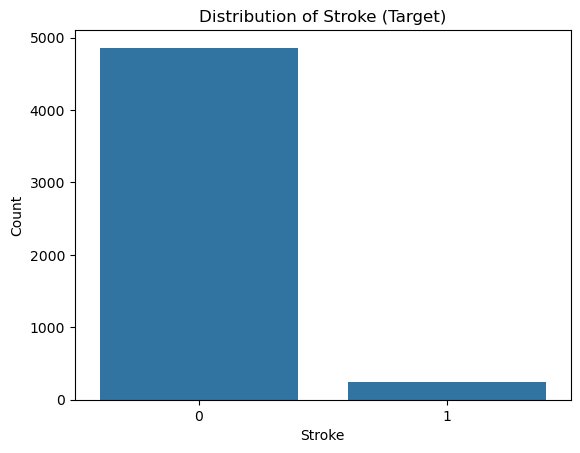

In [55]:
# Visualizing the distribution of the target variable (stroke)
sns.countplot(x='stroke', data=df)
plt.title('Distribution of Stroke (Target)')
plt.xlabel('Stroke')
plt.ylabel('Count')
plt.show()


The target variable is imbalanced, with stroke cases representing a small fraction of the dataset. This reflects real-world stats but introduces challenges for model evaluation. As a result, accuracy alone is insufficient, and greater emphasis is placed on recall and F1-score to ensure the model effectively identifies high-risk stroke patients.

### 2.3.1.2 Understanding distribution of features

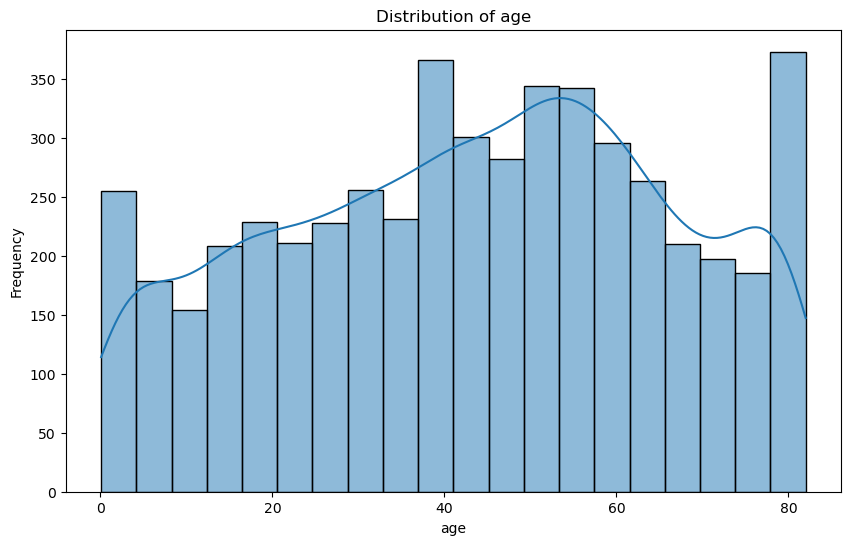

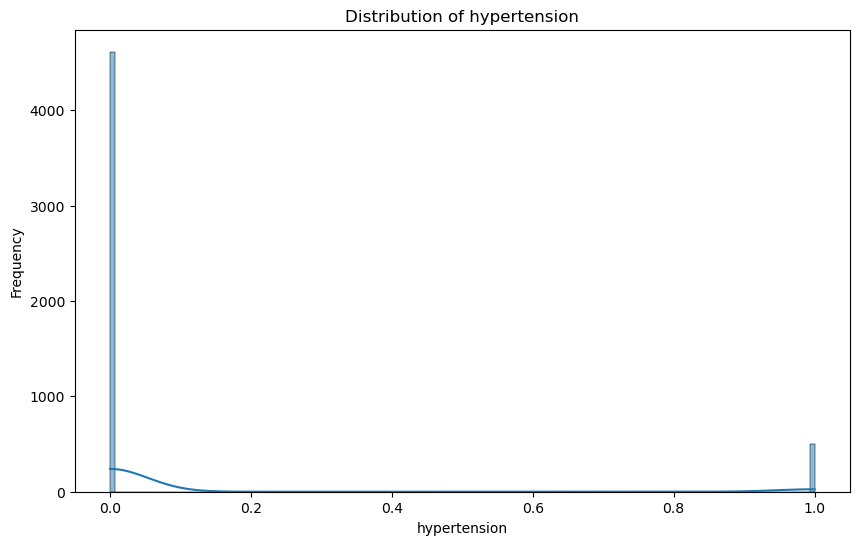

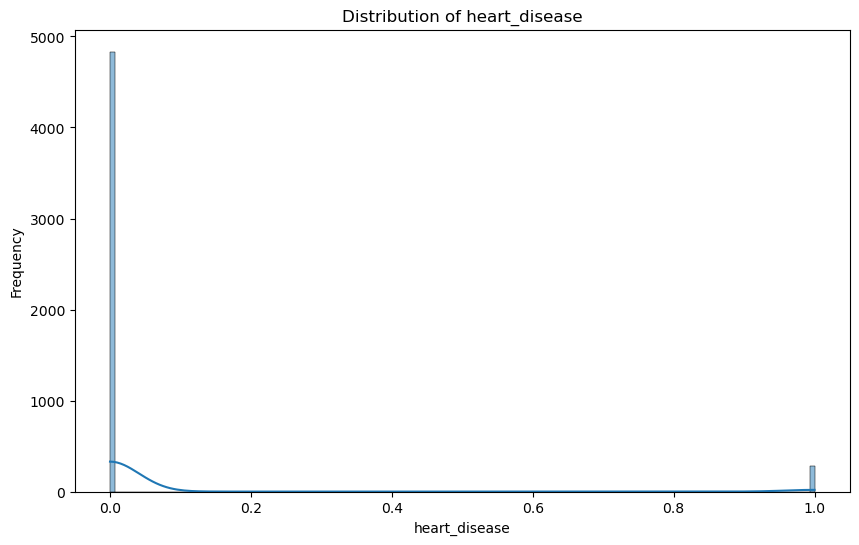

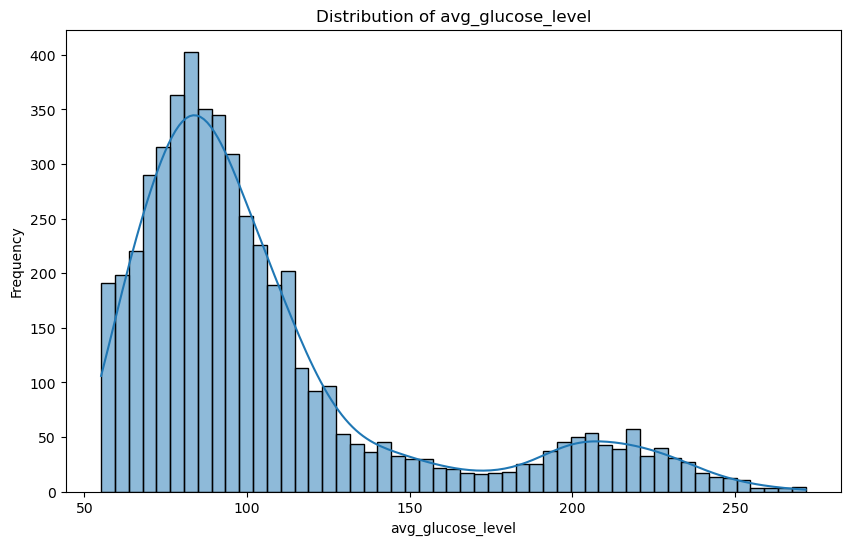

In [56]:
## Understanding distribution of features
# Visualizing the distribution of some numerical features (e.g., age, blood pressure)
features = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level']
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()


### Distribution of age
Values range from young to elderly roughly 0-80, majority of observations are middle-aged to older adults. Secondly, distribution is not uniform, with higher density in older age groups. Indicares age is a continous variable with a good spread. 
### Distribution of hypertension
Binary feature with values 0 for no and 1 for yes. Large majority of the records are 0, while very few are 1. This shows serve class imbalance, KDE(Kernal Density Estimation) curve is misleading. Indicates hypertension is rare but potentially important.

### Distribution of heart_disease
This is also a binary feature similar to hypertension. Most individuals do not have heart disease(0), with a very small population that have heart disease(1). There is also strong class imbalance present. Lastly, risk factor is under-represented, which may reduce model sensitivity.

### Overall observations from the distributions
Dataset contains continous numerica feture. Distribution is right skewed, witht the main concentration around normal glucose levels. I also observed smaller peaks at very high glucose values, suggesting there are diabetic cases within the dataset. Lastly, I also observe presence of outliers, which indicates a possible non-normal distribution.

## Overall
Overall dataset contains both continous and binary features. Medical condition variables are highly imbalanced, some numerical feature show skewness. Therefore accuracy alone may be misleading due to imbalance. This supports the use of recall instead of accuracy.

### 2.3.2 Understanding relationship between variables

In [57]:
## Understanding relationship between variables
col_numeric = df.select_dtypes(include=['float', 'int']).columns

df_corr = df[col_numeric].corr()
df_corr

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.003084,0.006388
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945
bmi,0.003084,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000


### Relationship with stroke (My target variable)

Age(0.245): indicates moderate positive correlation with stroke, stroke risk tends to increase with age, and age is one of the strongest predictors in the dataset.

Heart disease(0.135): Weak positive correlation, however individuals with heart disease do have a higher likelyhood of stroke. Overall medical relevance is high despite weak correlation.

Hypertension(0.128):Weak positive correlation, however individuals with hypertension do have a higher likelyhood of stroke. Overall medical relevance is high despite weak correlation.

avg glucose level (0.132): Weak correlation with stroke, hugher glucose levels are associated with higher stroke risk.

BMI (0.042): Very weak correlation with stroke, suggests BMI alone is not a strong predictor.

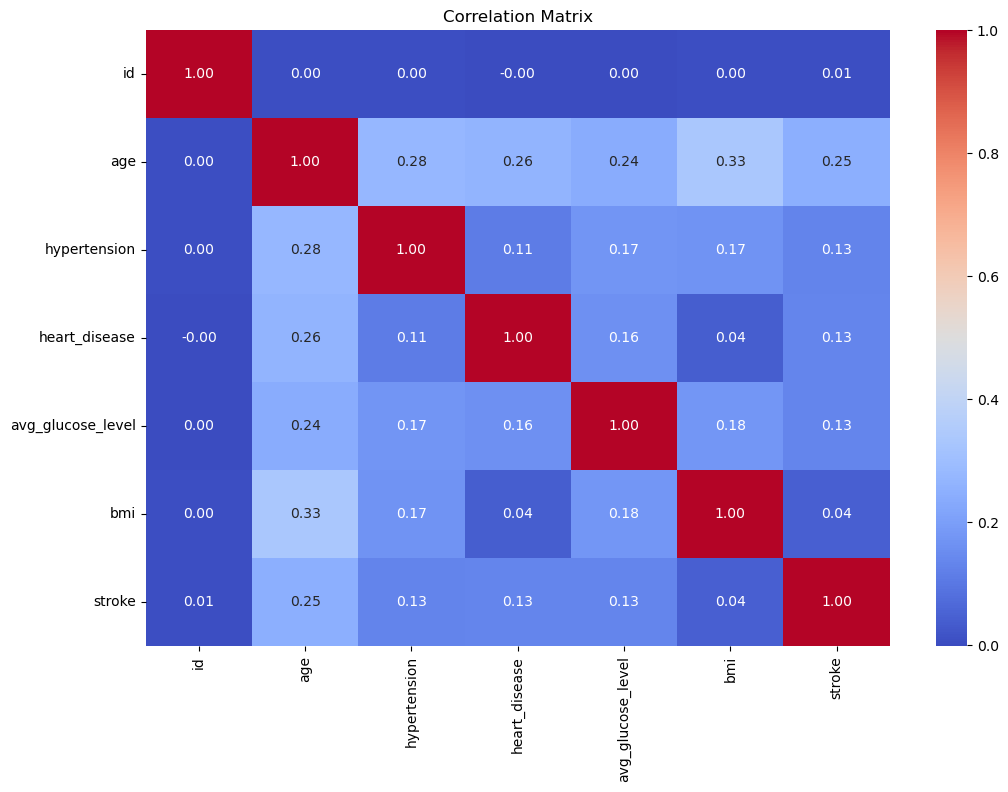

In [58]:
# Correlation matrix and heatmap
correlation_matrix = df[col_numeric].corr()  # Use only numeric columns
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


The heat map shows a allows me to visualise the data previously seen, reiterating the same information of:

Age(0.245): indicates moderate positive correlation with stroke, stroke risk tends to increase with age, and age is one of the strongest predictors in the dataset.

Heart disease(0.135): Weak positive correlation, however individuals with heart disease do have a higher likelyhood of stroke. Overall medical relevance is high despite weak correlation.

Hypertension(0.128):Weak positive correlation, however individuals with hypertension do have a higher likelyhood of stroke. Overall medical relevance is high despite weak correlation.

avg glucose level (0.132): Weak correlation with stroke, hugher glucose levels are associated with higher stroke risk.

BMI (0.042): Very weak correlation with stroke, suggests BMI alone is not a strong predictor.

# 3. Data Preparation

## 3.1 Data Cleaning

In [ ]:


# Create a copy of the dataset to preserve the original data
df_clean = df.copy()

# Drop non-informative / weak predictor columns
df_clean.drop(
    columns=[
        "id",                 # identifier
        "ever_married",       # weak contribution
        "work_type",          # low importance
        "Residence_type"      # low importance
    ],
    inplace=True
)

# Impute missing BMI values using the median
bmi_median = df_clean["bmi"].median()
df_clean["bmi"].fillna(bmi_median, inplace=True)

# Verify that there are no missing values remaining
df_clean.isna().sum()




C:\Users\Benjamin\AppData\Local\Temp\ipykernel_37700\1846880918.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean["bmi"].fillna(bmi_median, inplace=True)


gender               0
age                  0
hypertension         0
heart_disease        0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [60]:
#sanity check that irrelevant columns are dropped
print(df_clean.columns)

Index(['gender', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi', 'smoking_status', 'stroke'],
      dtype='object')


The data set has been cleaned, non-informative collumns such as id has been dropped, and as for missing BMI value, missing BMI values were imputed using median, which is robust to skewed data and outliers. Overall the cleaned data set was saved and a sanity check was done on it as the last step. The cleaned dataset contains no missing values and is ready for modelling and deployment.

## 3.2 Train-Test Split

In [61]:
## Split data into train set and test set

from sklearn.model_selection import train_test_split

# Separate features and target variable
X = df_clean.drop(columns=['stroke'])
y = df_clean['stroke']

# Split the data into training and testing sets
# Stratify is used to preserve class imbalance in both sets
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=2026,
    stratify=y
)

# Check the shape of the splits
X_train.shape, X_test.shape


((4088, 7), (1022, 7))

In [62]:
import pandas as pd

summary = pd.DataFrame({
    "Train count": y_train.value_counts().sort_index(),
    "Test count": y_test.value_counts().sort_index(),
    "Train %": y_train.value_counts(normalize=True).sort_index() * 100,
    "Test %": y_test.value_counts(normalize=True).sort_index() * 100
})

summary


,Train count,Test count,Train %,Test %
stroke,,,,
0,3889,972,95.132094,95.107632
1,199,50,4.867906,4.892368


An 80–20 train–test split was selected to balance model learning and evaluation reliability.

With a dataset of 5,110 samples, allocating 80% of the data to training ensures that the model has sufficient examples to learn meaningful patterns, particularly for the minority stroke class. At the same time, reserving 20% of the data for testing provides an independent and representative set of unseen data to evaluate model generalisation.Lastly, a summary table was created comparing class distribution between training and test sets, and confirms whter the class imbalance is consistent across train and test splits, which helps verify that the split is representative and not introducing sampling bias

## 3.3 OHE

In [63]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Identify categorical and numerical columns dynamically
categorical_cols = X_train.select_dtypes(include=["object"]).columns
numerical_cols = X_train.select_dtypes(exclude=["object"]).columns

# Define preprocessing transformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_cols),
        ("cat", OneHotEncoder(
            drop="first",
            handle_unknown="ignore"
        ), categorical_cols)
    ],
    remainder="drop"
)

# Fit preprocessing on training data only
X_train_processed = preprocessor.fit_transform(X_train)

# Apply same transformation to test data
X_test_processed = preprocessor.transform(X_test)

The code above automatically seperates numerical and categorical features based on data types. followed by applying StandardScaler to numerical features to standardise their scale, followed by One-Hot Encoding to categorical features to convert them into numerical form. I also used drop="first" to avoid dummy variable trap and used handle_unknown="ignore" to safely handle unseen categories in test data. This fits preprocessing only on training data to prevent data leakage, and applies the same transformation to the test data for fair model evaluation. Overall the main goal of One-Hot Encoding is to produce fully processed feature matrics ready for modelling.

# 4. Modelling

## 4.1 Basline Model Evaluation

In [64]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.cluster import KMeans

baseline_models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=2026),
    "Linear Discriminant Analysis": LinearDiscriminantAnalysis(),
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(random_state=2026),
    "Gradient Boosting Regressor": GradientBoostingRegressor(random_state=2026),
    "Random Forest Regressor": RandomForestRegressor(random_state=2026),
    "KMeans (k=2)": KMeans(n_clusters=2, random_state=2026)
}


### Baseline test model choice explaination and reasoning
**Logistic regression**
1. Standard baseline classificaiton model
2. Easy to interpret and explain
3. Serves as a reference point for the more complex models

**Linear Discriminat Analysis (LDA)**
1. Designed for binary classification
2. LDA is designed to explicitly maximise class separability, not just prediction accuracy
3. Works well when classes have overlapping features
4. Stroke prediciton involves subtle differences between stroke and non-stroke cases rather than clear seperations

**Linear Regression**
1. Included as a continous risk-score baseline
2. Outpits a numeric score that can be threshold into classes
3. Help asses if my problem behaves more like a regression of risk than a hard classification task

**Decision Tree Regressor**
1. Captures non-lineaer relationships between features
2. Produces continous outputs suitable for thresholding
3. More interpretable than other models
4. Helps detect feature interactions missed by linear models

**Gradient Boosting Regressor**
1. Esemble method that combines multiple weak learners, and handle complex non-linear patterns effectively.
2. Often perfoems well on imbalanced dataset.

**Random Forest Regressor**
1. Random forrect can reduces overfitting by averaging multiple trees
2. It can act as a strong general-purpose baseline for structured data

**KMeans**
1. Included as an unsupervised baseline
2. Poor performance can indicate that labels are not driven by obvious clusters

**Why I tested regression models for a classification problem**
Although the task is classification, regression models were evaluated because they produce continous risk scores that can be threshold into class labels, enablung better handling of class imbalance, threshold optimisation and probabilistic decision making.

### 4.2 Train Model

In [88]:
trained_models = {}

custom_class_weight = {0: 1, 1: 1}

for name, model in baseline_models.items():

    # Apply class_weight ONLY if the model supports it
    if "class_weight" in model.get_params():
        model.set_params(class_weight=custom_class_weight)

    model.fit(X_train_processed, y_train)
    trained_models[name] = model


For my model training manual class weighting was chosen over automatic balancing to allow controlled experimentation with different weight configurations, enablng clearer observation of how eahc model responds to imbalance and supporting more informed model selection. This was especially helpful due to my dataset unbalanced at 95% 0 (no stroke) and 5% 1 (stroke)

# 5. Model Evaluation

In [ ]:
from sklearn.metrics import classification_report

THRESHOLD = 0.30  # same threshold used everywhere

for name, model in baseline_models.items():
    print("=" * 70)
    print(f"MODEL: {name}")
    print("=" * 70)

    # Fit model
    model.fit(X_train_processed, y_train)



    # Case 1: Classifiers with probabilities
    if hasattr(model, "predict_proba"):
        y_test_scores = model.predict_proba(X_test_processed)[:, 1]
        y_test_pred = (y_test_scores >= THRESHOLD).astype(int)

    # Case 2: Regressors (continuous output)
    elif hasattr(model, "predict"):
        y_test_scores = model.predict(X_test_processed)

        # Convert continuous output to binary
        y_test_pred = (y_test_scores >= THRESHOLD).astype(int)

    else:
        raise ValueError(f"Model {name} cannot generate predictions")

    # FULL classification report
    print(
        classification_report(
            y_test,
            y_test_pred,
            target_names=["Non-Stroke", "Stroke"],
            zero_division=0
        )
    )


MODEL: Logistic Regression
              precision    recall  f1-score   support

  Non-Stroke       0.95      0.99      0.97       972
      Stroke       0.22      0.04      0.07        50

    accuracy                           0.95      1022
   macro avg       0.59      0.52      0.52      1022
weighted avg       0.92      0.95      0.93      1022

MODEL: Linear Discriminant Analysis
              precision    recall  f1-score   support

  Non-Stroke       0.96      0.97      0.96       972
      Stroke       0.19      0.14      0.16        50

    accuracy                           0.93      1022
   macro avg       0.58      0.56      0.56      1022
weighted avg       0.92      0.93      0.92      1022

MODEL: Linear Regression
              precision    recall  f1-score   support

  Non-Stroke       0.95      1.00      0.97       972
      Stroke       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.base import is_classifier

THRESHOLD = 0.30
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=2026)

results = []

for name, model in baseline_models.items():


    if is_classifier(model):
        val_acc = cross_val_score(
            model,
            X_train_processed,
            y_train,
            cv=cv,
            scoring="accuracy"
        ).mean()
    else:
        val_acc = np.nan   # Not applicable for regressors


    # Train model
    model.fit(X_train_processed, y_train)


    # Predict on test set
    if hasattr(model, "predict_proba"):
        y_test_scores = model.predict_proba(X_test_processed)[:, 1]
    else:
        y_test_scores = model.predict(X_test_processed)

    y_test_pred = (y_test_scores >= THRESHOLD).astype(int)


    # Extract numeric metrics
    report = classification_report(
        y_test,
        y_test_pred,
        output_dict=True,
        zero_division=0
    )

    stroke_metrics = report.get("1", {
        "precision": 0.0,
        "recall": 0.0,
        "f1-score": 0.0
    })

    results.append({
        "Model": name,
        "Val_Accuracy_CV": round(val_acc, 3) if not np.isnan(val_acc) else np.nan,
        "Test_Accuracy": round(accuracy_score(y_test, y_test_pred), 3),
        "Stroke_Precision": round(stroke_metrics["precision"], 3),
        "Stroke_Recall": round(stroke_metrics["recall"], 3),
        "Stroke_F1": round(stroke_metrics["f1-score"], 3)
    })


# Final results table
results_df = pd.DataFrame(results)
results_df


,Model,Val_Accuracy_CV,Test_Accuracy,Stroke_Precision,Stroke_Recall,Stroke_F1
0,Logistic Regression,0.951,0.946,0.222,0.04,0.068
1,Linear Discriminant Analysis,0.944,0.930,0.194,0.14,0.163
2,Linear Regression,NaN,0.951,0.000,0.00,0.000
3,Decision Tree Regressor,NaN,0.913,0.180,0.22,0.198
4,Gradient Boosting Regressor,NaN,0.943,0.346,0.18,0.237
5,Random Forest Regressor,NaN,0.912,0.167,0.20,0.182
6,KMeans (k=2),NaN,0.129,0.043,0.80,0.082


From the 2 evaluation outputs, Linear Disciminat Analysis (LDA) was selected as the final model as it proivdes the best balance between predictive performance, under class imbalance. Although some models achieved higher stroke recall, they exhibited unstable behaviour and increase false positive. 

Overall stroke recall, stroke F1-score, macro-averaged metrics and validation accuracy were the key metrics that justified selecting LDA over higher accuracy models that failed to detect stroke cases.

Final verdict, Linear Disciminant Analysis (LDA) was selected as the final model as it shows the most consistent performance across key evaluation metrics. This consistency indicated robust generalisation under serve class imbalance and reduces sensitivity to threshold and hyperparameter tuning, making LDA a more reliable and interpretable choice for stroke risk screening.

## Iterative model development


In [68]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()


## Feature importance

C:\Users\Benjamin\AppData\Local\Temp\ipykernel_37700\370357456.py:75: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(plot_df["Feature"], rotation=45, ha="right")


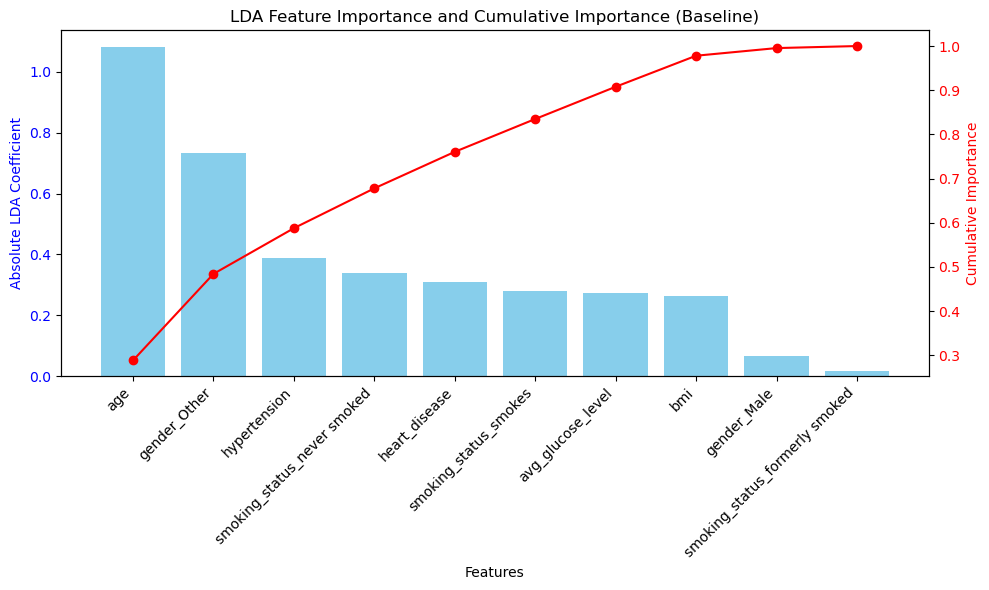

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline



# Identify feature types
numeric_features = X_train.select_dtypes(include=["int64", "float64"]).columns
categorical_features = X_train.select_dtypes(include=["object", "category"]).columns


# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), categorical_features)
    ]
)

# Full pipeline: preprocessing + LDA
lda_pipeline = Pipeline([
    ("preprocess", preprocessor),
    ("lda", LinearDiscriminantAnalysis())
])

# Train baseline LDA
lda_pipeline.fit(X_train, y_train)


# Extract feature names after encoding
feature_names = (
    list(numeric_features) +
    list(
        lda_pipeline.named_steps["preprocess"]
        .named_transformers_["cat"]
        .get_feature_names_out(categorical_features)
    )
)


# LDA feature importance (absolute coefficients)
lda_coefficients = lda_pipeline.named_steps["lda"].coef_[0]

df_lda_feat_impt = pd.DataFrame({
    "Feature": feature_names,
    "Importance": np.abs(lda_coefficients)
}).sort_values(by="Importance", ascending=False)

df_lda_feat_impt["Cumulative Importance"] = (
    df_lda_feat_impt["Importance"].cumsum()
    / df_lda_feat_impt["Importance"].sum()
)


# Plot (same style as your original example)
TOP_N = 15
plot_df = df_lda_feat_impt.head(TOP_N)

fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar chart
ax1.bar(plot_df["Feature"], plot_df["Importance"], color="skyblue")
ax1.set_xlabel("Features")
ax1.set_ylabel("Absolute LDA Coefficient", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")
ax1.set_xticklabels(plot_df["Feature"], rotation=45, ha="right")

# Line chart
ax2 = ax1.twinx()
ax2.plot(
    plot_df["Feature"],
    plot_df["Cumulative Importance"],
    color="red",
    marker="o"
)
ax2.set_ylabel("Cumulative Importance", color="red")
ax2.tick_params(axis="y", labelcolor="red")

plt.title("LDA Feature Importance and Cumulative Importance (Baseline)")
plt.tight_layout()
plt.show()


**Description:**
The bar chart displays the absolute LDA coefficients for each feature, representing how strongly each variable contributes to separating stroke and non-stroke cases.

**Interpretation of Feature Importance:**
Age is the most influential feature, contributing the largest share to the prediction, indicating that it plays a dominant role in distinguishing stroke from non-stroke cases. This aligns with the establish medical understadning that stroke risk increase as we age.

The next most important features are hypertension, heart disease, and smoking status, which reflect underlying health conditions and lifestyle factors commonly associated with stroke risk. These features collectively account for a substantial proportion of the model

Features such as average glucose level and BMI have moderate importance, suggesting that those factors contribute to a stroke risk but are second compared to age, hypertension or heart disease.

Finally the high importance of gender_other reflects statistical seperation caused by a rare category in OHE rather than a true clinical risk, highlighting the need to interpret LDA coefficients in context. Therefore gener-related features and less frequent smoking categories have relatively small coefficents and appear near the end of the plot indicating limited contribution once the primary risk factors are accounted for.

## Retrain model based of feature importance

In [70]:
X_full = df_clean.drop(columns=["stroke"])
y = df_clean["stroke"]


In [91]:
selected_features = [
    "age",
    "hypertension",
    "heart_disease",
    "avg_glucose_level",
    "bmi",
    "smoking_status"
]

X_reduced = df_clean[selected_features]


This portion of my code performs feature selection by retaining only variable that are clinically relevant and meaningful for stroke prediction.

In [99]:
from sklearn.model_selection import train_test_split

X_train_full, X_test_full, y_train, y_test = train_test_split(
    X_full,
    y,
    test_size=0.2,
    random_state=2026,
    stratify=y
)

X_train_red, X_test_red, _, _ = train_test_split(
    X_reduced,
    y,
    test_size=0.2,
    random_state=2026,
    stratify=y
)


In [100]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder


In [101]:
cat_full = X_train_full.select_dtypes(include=["object"]).columns
num_full = X_train_full.select_dtypes(exclude=["object"]).columns

preprocessor_full = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_full),
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), cat_full)
    ]
)

X_train_full_p = preprocessor_full.fit_transform(X_train_full)
X_test_full_p = preprocessor_full.transform(X_test_full)


In [102]:
cat_red = X_train_red.select_dtypes(include=["object"]).columns
num_red = X_train_red.select_dtypes(exclude=["object"]).columns

preprocessor_red = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_red),
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), cat_red)
    ]
)

X_train_red_p = preprocessor_red.fit_transform(X_train_red)
X_test_red_p = preprocessor_red.transform(X_test_red)


## Train model again

In [103]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda_full = LinearDiscriminantAnalysis()
lda_full.fit(X_train_full_p, y_train)

lda_reduced = LinearDiscriminantAnalysis()
lda_reduced.fit(X_train_red_p, y_train)


,solver,'svd'
,shrinkage,None
,priors,None
,n_components,None
,store_covariance,False
,tol,0.0001
,covariance_estimator,None


## Evaluate the model

In [ ]:
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold, cross_val_score

THRESHOLD = 0.30  # keep consistent everywhere

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=2026)

models_to_compare = {
    "LDA (All Features)": {
        "model": lda_full,
        "X_test": X_test_full_p,
        "X_train": X_train_full_p
    },
    "LDA (Reduced Features)": {
        "model": lda_reduced,
        "X_test": X_test_red_p,
        "X_train": X_train_red_p
    }
}

for name, obj in models_to_compare.items():
    print("=" * 70)
    print(f"MODEL: {name}")
    print("=" * 70)

    model = obj["model"]
    X_test_used = obj["X_test"]
    X_train_used = obj["X_train"]

    # Validation accuracy (CV)
   
    val_acc = cross_val_score(
        model,
        X_train_used,
        y_train,
        cv=cv,
        scoring="accuracy"
    ).mean()

    print(f"Validation Accuracy (CV): {val_acc:.3f}")

    # Test set evaluation
    y_test_scores = model.predict_proba(X_test_used)[:, 1]
    y_test_pred = (y_test_scores >= THRESHOLD).astype(int)

    print(
        classification_report(
            y_test,
            y_test_pred,
            target_names=["Non-Stroke", "Stroke"],
            zero_division=0
        )
    )


MODEL: LDA (All Features)
Validation Accuracy (CV): 0.944
              precision    recall  f1-score   support

  Non-Stroke       0.96      0.97      0.96       972
      Stroke       0.19      0.14      0.16        50

    accuracy                           0.93      1022
   macro avg       0.58      0.56      0.56      1022
weighted avg       0.92      0.93      0.92      1022

MODEL: LDA (Reduced Features)
Validation Accuracy (CV): 0.944
              precision    recall  f1-score   support

  Non-Stroke       0.96      0.97      0.96       972
      Stroke       0.19      0.14      0.16        50

    accuracy                           0.93      1022
   macro avg       0.58      0.56      0.56      1022
weighted avg       0.92      0.93      0.92      1022



**Observation:**
No noticeble difference in performance was observed for LDA model trained on all feature and the LDA model trained on the reduced feature set. Both models achieved identical cross validation accuracy and produced the same precision,recall,f1-score across stroke and non-stroke.

**Decision**
As feature reduction did not lead to any measureable performance improvement, the LDA model using all available feature will be retained and used for hyperparameter tuning

## Hyperparameter Tuning RanomdSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

param_dist = {
    "solver": ["lsqr", "eigen"],       # 2 values
    "shrinkage": [None, "auto", 0.1]   # 3 values
}

lda_base = LinearDiscriminantAnalysis()

random_search = RandomizedSearchCV(
    estimator=lda_base,
    param_distributions=param_dist,
    n_iter=6,                    
    scoring="recall",            
    cv=5,
    random_state=2026,
    n_jobs=-1
)

random_search.fit(X_train_red_p, y_train)


c:\Users\Benjamin\anaconda3\envs\mldp\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
1 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Benjamin\anaconda3\envs\mldp\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Benjamin\anaconda3\envs\mldp\Lib\site-packages\sklearn\base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Benjamin\anaconda3\envs\mldp\Lib\site-packages\sklearn\discrimina

,estimator,LinearDiscriminantAnalysis()
,param_distributions,"{'shrinkage': [None, 'auto', ...], 'solver': ['lsqr', 'eigen']}"
,n_iter,6
,scoring,'recall'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,2026
,error_score,nan


In [79]:
print("Best Parameters:")
print(random_search.best_params_)

print("\nBest CV Recall:")
print(random_search.best_score_)


Best Parameters:
{'solver': 'lsqr', 'shrinkage': 'auto'}

Best CV Recall:
0.13115384615384618


In [80]:
from sklearn.metrics import classification_report

best_lda = random_search.best_estimator_

THRESHOLD = 0.30

y_test_scores = best_lda.predict_proba(X_test_red_p)[:, 1]
y_test_pred = (y_test_scores >= THRESHOLD).astype(int)

print(
    classification_report(
        y_test,
        y_test_pred,
        target_names=["Non-Stroke", "Stroke"],
        zero_division=0
    )
)


              precision    recall  f1-score   support

  Non-Stroke       0.96      0.95      0.96       972
      Stroke       0.24      0.30      0.27        50

    accuracy                           0.92      1022
   macro avg       0.60      0.63      0.61      1022
weighted avg       0.93      0.92      0.92      1022



In [81]:
from sklearn.metrics import recall_score, f1_score

# Baseline reduced LDA
y_base_scores = lda_reduced.predict_proba(X_test_red_p)[:, 1]
y_base_pred = (y_base_scores >= THRESHOLD).astype(int)

baseline_recall = recall_score(y_test, y_base_pred)
baseline_f1 = f1_score(y_test, y_base_pred)

# Tuned LDA
tuned_recall = recall_score(y_test, y_test_pred)
tuned_f1 = f1_score(y_test, y_test_pred)

comparison_df = pd.DataFrame({
    "Model": ["LDA (Reduced – Baseline)", "LDA (Reduced – Tuned)"],
    "Stroke Recall": [baseline_recall, tuned_recall],
    "Stroke F1": [baseline_f1, tuned_f1]
})

comparison_df


,Model,Stroke Recall,Stroke F1
0,LDA (Reduced – Baseline),0.14,0.162791
1,LDA (Reduced – Tuned),0.30,0.265487


In [82]:
y_scores = best_lda.predict_proba(X_test_red_p)[:, 1]

# Try sensible thresholds
for t in [0.10, 0.15, 0.20, 0.25, 0.30]:
    preds = (y_scores >= t).astype(int)
    print(
        t,
        f1_score(y_test, preds),
        recall_score(y_test, preds)
    )


0.1 0.24752475247524752 0.5
0.15 0.27218934911242604 0.46
0.2 0.2684563758389262 0.4
0.25 0.26356589147286824 0.34
0.3 0.26548672566371684 0.3


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import make_scorer, f1_score


stroke_f1 = make_scorer(f1_score, pos_label=1)

param_dist = {
    "solver": ["lsqr"],                 # most stable for imbalance for my glorious 95 to 5 dara imbalance
    "shrinkage": [None, "auto", 0.1],
    "priors": [
        [0.80, 0.20]    
    ]
}

lda_base = LinearDiscriminantAnalysis()

random_search = RandomizedSearchCV(
    estimator=lda_base,
    param_distributions=param_dist,
    n_iter=3,
    scoring=stroke_f1,     
    cv=5,
    random_state=2026,
    n_jobs=-1
)

random_search.fit(X_train_red_p, y_train)

best_lda = random_search.best_estimator_
random_search.best_params_


{'solver': 'lsqr', 'shrinkage': None, 'priors': [0.8, 0.2]}

This code performs hyperparameter tuning for a Linear Discriminant Analysis (LDA) model to improve stroke prediction on an imbalanced dataset.A custom F1-score scorer is created to focus specifically on the stroke class (label = 1), ensuring the model does not collapse into predicting only non-stroke cases.The lsqr solver is chosen because it is more stable for imbalanced data and supports shrinkage, which improves covariance estimation.The shrinkage parameter is tuned to control regularisation, helping reduce overfitting and improve generalisation.Class priors are explicitly set to [0.80, 0.20] to reduce bias towards the majority non-stroke class and encourage stroke detection.

## Comparing tuned model against the base model

In [ ]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    roc_auc_score,
    recall_score,
    make_scorer
)


# SETTINGS

THRESHOLD = 0.30
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=2026)
stroke_recall_scorer = make_scorer(recall_score, pos_label=1)


# REBUILD DATA 

X = df_clean.drop(columns=["stroke"])   # <-- adjust target name if needed
y = df_clean["stroke"]

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    stratify=y,
    random_state=2026
)


# PIPELINES

models = {
    "LDA (Baseline)": Pipeline([
        ("preprocess", preprocessor),
        ("model", lda_base)
    ]),
    "LDA (Tuned)": Pipeline([
        ("preprocess", preprocessor),
        ("model", best_lda)
    ])
}

results = []


# EVALUATION
for name, pipe in models.items():

    # Cross-validation Stroke Recall
    cv_recall = cross_val_score(
        pipe,
        X_train,
        y_train,
        cv=cv,
        scoring=stroke_recall_scorer
    ).mean()

    # Train full model
    pipe.fit(X_train, y_train)

    # Test predictions
    y_test_scores = pipe.predict_proba(X_test)[:, 1]
    y_test_pred = (y_test_scores >= THRESHOLD).astype(int)

    report = classification_report(
        y_test,
        y_test_pred,
        output_dict=True,
        zero_division=0
    )

    stroke_metrics = report["1"]

    results.append({
        "Model": name,
        "CV_Recall_Stroke": round(cv_recall, 3),
        "Test_Accuracy": round(accuracy_score(y_test, y_test_pred), 3),
        "Stroke_Precision": round(stroke_metrics["precision"], 3),
        "Stroke_Recall": round(stroke_metrics["recall"], 3),
        "Stroke_F1": round(stroke_metrics["f1-score"], 3),
        "ROC_AUC": round(roc_auc_score(y_test, y_test_scores), 3)
    })

comparison_df = pd.DataFrame(results)
comparison_df


c:\Users\Benjamin\anaconda3\envs\mldp\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\Benjamin\anaconda3\envs\mldp\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


,Model,CV_Recall_Stroke,Test_Accuracy,Stroke_Precision,Stroke_Recall,Stroke_F1,ROC_AUC
0,LDA (Baseline),0.035,0.93,0.194,0.14,0.163,0.842
1,LDA (Tuned),0.331,0.81,0.164,0.70,0.265,0.849


Stroke recall, test accuract and ROC_AUC were prioritised during model tuning as the objective was to produce a probability based stroke risk screening model. Recall was emphasised to minimise false negatives, ensuring high-risk individuals are not missed. ROC_AUC was used to asses the quality of probability ranking independently of the glassification threshold, making it particularly suitable for probability estimation. Test accuracy was retained as a secondary metric to ensure overall model stability and prevent majority class collpase. Together, these metrics provide a balanced evaluation aligned with the healthcare screening requirements.

## Streamlit

In [ ]:

from sklearn.pipeline import Pipeline
import joblib

lda_pipe = Pipeline([
    ("preprocess", preprocessor),
    ("model", best_lda)  # the best model tuned
])

lda_pipe.fit(X_train, y_train)
joblib.dump(lda_pipe, "lda_tuned_model.pkl")


['lda_tuned_model.pkl']